**Table of contents**<a id='toc0_'></a>    
- 1.1. [Исследование данных о российском кинопрокате](#toc1_1_)    
    - 1.1.1. [Шаг 1. Откройте файлы с данными и объедините их в один датафрейм.](#toc1_1_1_)    
    - 1.1.2. [Шаг 2. Предобработка данных](#toc1_1_2_)    
      - 1.1.2.1. [Шаг 2.1. Проверьте типы данных](#toc1_1_2_1_)    
      - 1.1.2.2. [Шаг 2.2. Изучите пропуски в датафрейме](#toc1_1_2_2_)    
      - 1.1.2.3. [Шаг 2.3. Изучите дубликаты в датафрейме](#toc1_1_2_3_)    
      - 1.1.2.4. [Шаг 2.4. Изучите категориальные значения](#toc1_1_2_4_)    
      - 1.1.2.5. [Шаг 2.5. Проверьте количественные значения](#toc1_1_2_5_)    
      - 1.1.2.6. [Шаг 2.6. Добавьте новые столбцы](#toc1_1_2_6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1.1. <a id='toc1_1_'></a>[Исследование данных о российском кинопрокате](#toc0_)



**`Описание проекта`**

Цель этого проекта, выявить `текущие тренды` на рынке российского кинопроката, уделяя особое внимание фильмам, которые получили гос. поддержку. 

Основная задача, это выявить, насколько фильмы пользующиеся гос. поддержкой `интересны зрителю`.

### 1.1.1. <a id='toc1_1_1_'></a>[Шаг 1. Откройте файлы с данными и объедините их в один датафрейм.](#toc0_)

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
!pip install missingno

In [2]:
# импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
# загружаем файл в датасет используя как локальный так и учебный путь к файлу

try:
    movies = pd.read_csv('mkrf_movies.csv')
except:
    movies = pd.read_csv('/datasets/mkrf_movies.csv')
    

In [ ]:
# загружаем файл в датасет используя как локальный так и учебный путь к файлу

try:
    shows = pd.read_csv('mkrf_shows.csv')
except:
    shows = pd.read_csv('/datasets/mkrf_shows.csv')

Выводим общую информацию о двух таблицах, обращаем внимание на тип даты и в частности на тип ключевой колоки `'puNumber'` которая нам понадобится для объединения таблиц методом `merge()`. 

In [ ]:
# выводим общую информацию по обеим таблицам. Обращаем внимание на колонку 'puNumber'

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [ ]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Мы видим что величины в колонке 'puNumber' в разных таблицах находятся в разных форматах: object и int64. Попробуем конвертировать типы данных для последущего объединения таблиц методом `merge()`

In [ ]:
# пробуем применить конструкцию try-except

try:
    movies['puNumber'] = movies['puNumber'].astype('int64')
except:
    print('Конвертация невозможна, присутствуют неконвертируемые значения')
    
movies.dtypes

Конвертация невозможна, присутствуют неконвертируемые значения


title                     object
puNumber                  object
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
dtype: object

Тип не изменился.

Если не применять конструкцию try-except то мы увидим сообщение об ошибке, в котором доводится до нашего сведения наличие строки 'нет' в колонке, эта буквенная строка по понятным причинам не может быть конвертирована в числовое значение. 

Для успешной смены типа, нам необходимо найти строку со строчным значением 'нет' и удалить её.

In [ ]:
# находим строку где в клонке 'puNumber' вмместо цифр присутствует значение 'нет'.

movies = movies[movies['puNumber'] != 'нет']

# считаем количество колонок в таблице чтобы подтвердить факт удаления строки. Было 7486 - стало 7485. Строка стёрта.
movies.shape

(7485, 15)

Конвертируем 'puNumber' из `object`  в `int64`

In [ ]:
# конвертируем object -->> int64

movies['puNumber'] = movies['puNumber'].astype('int64')

# проверяем факт смены типа. Тип сменён на int64


movies['puNumber'].dtype

dtype('int64')

Объединяем обе таблицы по ключевой колонке `'puNumber'`

In [ ]:
# присоединяем колонку data2 к колонке data1 и сохраняем объединённую таблицу в df

df = movies.merge(shows, on='puNumber', how='left')

In [ ]:
# проверяем факт присоединения таблиц, как мы видим, колонка 'box_office' из data2 успешно добавилась в новый датафрейм df.

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


В результате первичного ознакомления с данными мы выполнили следущее:
- импортировали нужные датасеты
- удалили паразитное значение в ключевой колонке чтобы сменить тип данных необходимый для объединения таблиц
- объединили две таблицы в одну

Теперь мы готовы начать предобработку данных в нашей новой таблице.

### 1.1.2. <a id='toc1_1_2_'></a>[Шаг 2. Предобработка данных](#toc0_)

#### 1.1.2.1. <a id='toc1_1_2_1_'></a>[Шаг 2.1. Проверьте типы данных](#toc0_)

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [ ]:
# выводим типы данных по каждой колонке и первые несколько строк таблицы для наглядности, чтобы понять где нужна смена типа

print(df.dtypes)
df.head(3)

title                     object
puNumber                   int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


**Первичный анализ показал, что смене типа подлежат следущие колонки:**


|Колонки          |Было -> Стало             |Комментарий 
|---              |---                       |---                
|show_start_date  |object -> datetime        |дату необходимо перевести в спец. формат |
|ratings          |object -> float64         |рейтинг, несомненно, должен быть вещественным числом|

In [ ]:
# Меняем object -> datetime

df['show_start_date'] = pd.to_datetime(
    
    df['show_start_date'], format='%Y-%m-%dT%H:%M:%S'
) 

In [ ]:
# Вычленяем и удаляем знак '%' и переводим в формат числа больше похожего на рейтинг (от 0 до 10)

df['ratings'] = df['ratings'].replace('\%', '',regex=True)
df['ratings'] = df['ratings'].astype('float64')
df.loc[df['ratings'] >10, 'ratings'] = df['ratings'] / 10

In [ ]:
# Выводим на экран типы данных в колонках

df.dtypes

title                                 object
puNumber                               int64
show_start_date          datetime64[ns, UTC]
type                                  object
film_studio                           object
production_country                    object
director                              object
producer                              object
age_restriction                       object
refundable_support                   float64
nonrefundable_support                float64
budget                               float64
financing_source                      object
ratings                              float64
genres                                object
box_office                           float64
dtype: object

In [ ]:
# Проверяем факт отсутствия значений больше 10-ти. Такие значения отсутствуют, значит выбивающихся значений нет.

df.loc[df['ratings'] > 10, 'ratings'].count()

0

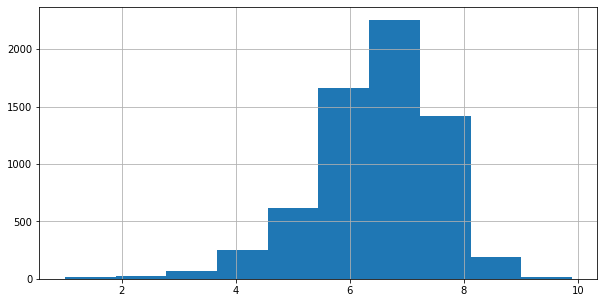

In [ ]:
# Код от ревьюера
df['ratings'].hist(figsize=(10, 5)) 
plt.show()

**Тип колонок нуждающихся в изменениии успешно сменён.**

#### 1.1.2.2. <a id='toc1_1_2_2_'></a>[Шаг 2.2. Изучите пропуски в датафрейме](#toc0_)

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [ ]:
# Считаем пропущенные значения по колонкам

df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

In [ ]:
# Выводим таблицу с пропусками в процентах

pd.DataFrame(round(df.isna().mean()*100)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


Для наглядности, выведем график с пропусками

<AxesSubplot:>

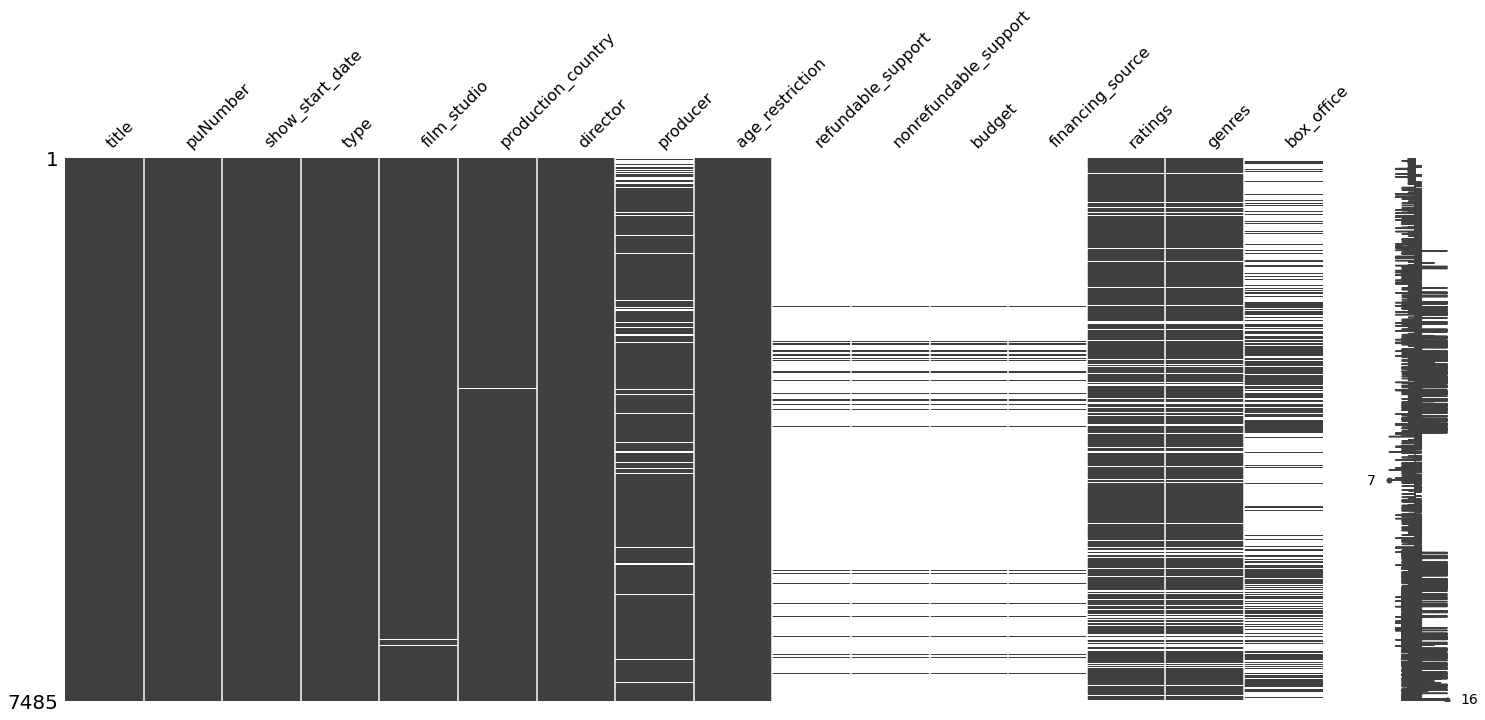

In [ ]:
# Выводим матрицу с графическим отображением пропущенных значений которые отображаются белым цветом
# Чтобы матрица заработала было сделано следущее: 1) pip install missingno (в командной строке) 2) import missingno as msno

msno.matrix(df)

Посмторим на колонки с наименьшим количеством пропусков: 

film_studio                18\
production_country          2\
director                    9

и выясним, можно ли заполнить эти попуски и стоит ли это делать.

In [ ]:
# выводим срез таблицы с пропусками в выбранных колонках

df[(df['production_country'].isna()) | (df['director'].isna()) | (df['film_studio'].isna())]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Проанализировав пропуски выше, я решил заполнить два пропуска в колонке 'production_country' тк ответ просто найти в общедоступных источниках.
С пропусками в колонках 'film_studio' и 'director' не всё так очевидно, тк некоторые "фильмы" вовсе не фильмы, а конценрты и у них есть продюссер, но нет режиссёра. Ситуация со съёмочной студией тоже не всегда ясна.

**Резюме:** я решил заполнить два пропуска в колонке 'production_country' вручную и оставить немногочисленные пропуски в других двух колонках 'film_studio' и 'director' как есть, в связи с неполнотой информации.

In [ ]:
# Заполняем пропущенные значния

df.loc[3185,'production_country'] = 'Россия'
df.loc[4440,'production_country'] = 'Россия'

# Проверяем результат - выводим срез с пропусками: индексов 3185 и 4440 среди пропусков больше нет

df[(df['production_country'].isna()) | (df['director'].isna())]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4941,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


In [ ]:
# Чтобы убедиться что пропуски в колонке 'budget', 'refundable_support', 'nonrefundable_support' 'financing_source' не являются случайными,
# а имеют пропуски в одних и тех же строках, считаем попарно количество общих пропусков.

print(len(df.loc[(df['budget'].isna()) & (df['refundable_support'].isna())]))
print(len(df.loc[(df['budget'].isna()) & (df['nonrefundable_support'].isna())]))
print(len(df.loc[(df['budget'].isna()) & (df['financing_source'].isna())]))

7153
7153
7153


Мы видим, что основное количество пропусков приходятся на колонки: 

'refundable_support'\
'nonrefundable_support'\
'budget'\
'financing_source'


У этих данных есть одна общая черта, информармация в вышеперечисленых колонках касается фильмов с господдержкой. Господдержку получили только те фильмы по котором имеется информация в колонке `budget`, таких фильмов `332`.

Заполнять и тем более стирать пропущенные значения в этих колонках считаю нецелесообразным на данном этапе.


#### 1.1.2.3. <a id='toc1_1_2_3_'></a>[Шаг 2.3. Изучите дубликаты в датафрейме](#toc0_)
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [ ]:
# Проверяем очевидные дубликаты - строки которые полностью повторяют уже встречавшиеся в датасете. Очевидных дубликатов нет.

df.duplicated().sum()

0

Проверим неочевидные дубликаты, для этого выведем уникальные значения по столбцам

In [ ]:
# Для удобства проверки уникальных значений создадим функцию, и посмотрим самые подозрительные колонки на предмет неочевидных пропусков

def uq(col):
    print(df[col].unique())

Выберем колонки наиболее чувствительные к дубликатам

In [ ]:
# Ищем дубликаты в типах фильмов. Есть два дубликата - типы фильмов: Художественный и Анимационный
# Разница в нвписании из-за пробела перед типом фильма

uq('type')

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']


In [ ]:
# Ищем дубликаты в возрастных ограничениях. Дубликатов нет

uq('age_restriction')

['«18+» - запрещено для детей' '«6+» - для детей старше 6 лет'
 '«12+» - для детей старше 12 лет' '«16+» - для детей старше 16 лет'
 '«0+» - для любой зрительской аудитории']


In [ ]:
df['title'].duplicated().sum()

714

In [ ]:
df[df['title'].duplicated()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",759526.0
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный",1125302.0


Мы выяснили, что явных дубликатов нет, но присутствуют неявные дубликаты в названии типов фильмов.
Скорее всего, категориальные дубликаты возникли в результате ошибки пользователя при занесении информаци, повторных переставлений или неправильного соединения данных из разных источников.

Также есть дублирующие друг-друга названия фильмов, однако, у них разные номера прокатных удостоверений. Что говорит, скорее, всего, что удостоверения выдавались не единажды.

#### 1.1.2.4. <a id='toc1_1_2_4_'></a>[Шаг 2.4. Изучите категориальные значения](#toc0_)

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [ ]:
# Выведем первые строки таблицы для изучения ответа на вопрос о категориальных столбцах

df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Насколько видно из таблицы, во многоих категориальных столбцах, таких как `'genres'`, `'film_studio'`, `'production_country'`, `'producer'` могут сосуществовать сразу несколько значений, например, над фильмом могли работать сразу несколько продюссеров или картина могла сниматься в нескольких странах.

Такое разнообразие делает категоризацию более запутаной и менее внятной.

В дополнение к вышесказанному, общая особеность катеориальных значений, это невозможность проводить над ними арифметические действия. Чтобы обойти это проблему, можно присвоить номерные значения категориям, это повысит возможости по их обработке но уменьшит читабельность.

In [ ]:
# Избавляемся от пробелов в наименовании типов в колонке 'type' и перезаписываем в колонку 'type'

df['type'] = df['type'].str.strip()

# Проверяем факт удаления пробелов

df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

#### 1.1.2.5. <a id='toc1_1_2_5_'></a>[Шаг 2.5. Проверьте количественные значения](#toc0_)

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Как уже было подмечено в задании 2.2 во время первичной предобработки данных - вывод можно сделать следующий:

Как известно из документации к исследованию, информармация в вышеперечисленых колонках касается фильмов с господдержкой, господдержку получили только те фильмы по котором имеется информация в колонке 'budget', таких фильмов 332.

Поэтому, заполнять и тем более, стирать пропущенные значения в этих колонках считаю нецелесообразным.

Соотношение столбцов можно описать нижеследующим образом:


In [ ]:
# Чтобы убедиться, что пропуски в колонке 'budget', 'refundable_support' и 'nonrefundable_support' не являются случайными,
# а имеют пропуски в одних и тех же строках, считаем попарно количество общих пропусков.

print(len(df.loc[(df['budget'].isna()) & (df['refundable_support'].isna())]))
print(len(df.loc[(df['budget'].isna()) & (df['nonrefundable_support'].isna())]))

7153
7153


Проверим, как соотносится буджет и субсидии предоставленные на съёмку фильма

In [ ]:
(df['budget'] >= df['refundable_support'] + df['nonrefundable_support']).sum()

315

In [ ]:
(df['budget'] <= df['refundable_support'] + df['nonrefundable_support']).sum()

17

**Вывод:** пропуски в трёх столбцах `'budget'`, `'refundable_support'` и `'nonrefundable_support'` приходятся на одни и те же строки.

Это говорит о том, что такие данные как объём возвратных средств государственной поддержки и объём невозвратных средств государственной поддержки актуальны только для тех картин, которые субсидируются государством.

Мы видим что в 17 случаях общий бюджет фильма меньше чем суммрные субсидии ('refundable_support'` и `'nonrefundable_support') что странно и похоже на ошибку в данных.

#### 1.1.2.6. <a id='toc1_1_2_6_'></a>[Шаг 2.6. Добавьте новые столбцы](#toc0_)





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [ ]:
# Создаём новый столбец о годе проката и выводим первые две строчки для проверки результата

df['show_start_year'] = df['show_start_date'].dt.year
df.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [ ]:
# Создаём функцию которая создаёт новые колонки с именем и фамилией главного режиссёра и основным жанром

def get_first_element(column):
    return column.str.split(',').str[0]


df['lead_director'] = get_first_element(df['director'])
df['main_genre'] = get_first_element(df['genres'])

In [ ]:
# Для проверки результата выводим показательный срез таблицы нв котором видны результы вычленения имени главного режиссёра и основного жанра

df[16:20]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,lead_director,main_genre
16,Осенний марафон,111007513,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Г.Данелия,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.0,"драма,мелодрама,комедия",NaN,2013,Г.Данелия,драма
17,Осень,111027914,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Смирнов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.4,"драма,мелодрама",NaN,2014,А.Смирнов,драма
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.0,"мелодрама,комедия",360.0,2016,Ю.Чулюкин,мелодрама
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,420.0,2016,В.Краснопольский,драма


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [ ]:
# Получаем процентное соотношение суммы выделеной в качестве господдержки к общему бюджету

df['gos_support%'] = ((df['refundable_support'] + df['nonrefundable_support']) / df['budget']) * 100

In [ ]:
# Проверяем наличие ожидаемых величин (процент господдержки в %)

df.loc[df['gos_support%'] <= 100]['gos_support%']

1281    33.370314
1448    70.000000
1498    61.269064
1524    69.009473
1792    62.476381
          ...    
7463    51.020408
7465    52.631579
7473    52.966102
7475    64.999783
7477    66.601175
Name: gos_support%, Length: 315, dtype: float64

In [ ]:
# Проеверяем выбивающиеся значения и считаем их. Всего - 17

df.loc[(df['gos_support%'] > 100) | (df['gos_support%'] < 0)]['gos_support%'].count()

17

In [ ]:
df.loc[(df['gos_support%'] > 100) | (df['gos_support%'] < 0)].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,lead_director,main_genre,gos_support%
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016.1,2014,А.Зайцев,мелодрама,inf
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,446163511.0,2015,Р.Прыгунов,драма,inf
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",196572438.4,2015,А.Андрианов,боевик,inf
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",67418974.8,2015,Д.Штурманова,комедия,inf
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551.4,2015,М.Фадеев,мультфильм,inf


**Вывод:** 

Значение `inf` означает что произошло деление на ноль. То есть госсубсидии есть, а общий бюджет нулевой, что похоже на ошибку в данных. 

Однако, заполнять пропуски не представляется возможным тк мы можем только догадываться какой был общий буджет. Мы только можем предположить что бюджет был не менее субсидированных средств, но точную сумму мы не знаем.


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [ ]:
df_pivot = df.pivot_table(index='show_start_year', values=['title', 'box_office'], aggfunc='count')
df_pivot

,box_office,title
show_start_year,,
2010,105,985
2011,109,622
2012,128,593
2013,184,630
2014,279,806
2015,465,705
2016,526,818
2017,357,505
2018,475,891


In [ ]:
# Выводим на экран долю фильмов показанных в прокате в кинотеатрах РФ от общих прокатов

df_pivot['relation'] = (df_pivot['box_office'] / df_pivot['title'])
pd.options.display.float_format = '{:.2%}'.format
df_pivot[df_pivot['relation'] == df_pivot['relation']]['relation']

show_start_year
2010   10.66%
2011   17.52%
2012   21.59%
2013   29.21%
2014   34.62%
2015   65.96%
2016   64.30%
2017   70.69%
2018   53.31%
2019   56.99%
Name: relation, dtype: float64

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

show_start_year
2010   10.66%
2011   17.52%
2012   21.59%
2013   29.21%
2014   34.62%
2015   65.96%
2016   64.30%
2017   70.69%
2018   53.31%
2019   56.99%
Name: relation, dtype: float64

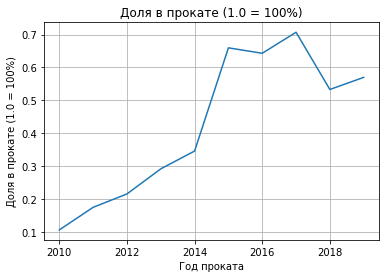

In [ ]:
# Очищаем колонку от пропусков и выводим таблицу с долей прокатов

relation = df_pivot['relation'].dropna()
display(relation)

# Выводим график с долей прокатов

relation.plot(y = 'relation',  grid = True)
plt.xlabel('Год проката')
plt.ylabel('Доля в прокате (1.0 = 100%)')
plt.title('Доля в прокате (1.0 = 100%)')
plt.show()

**Вывод:** 

Имеется общая тенденция к увеличению доли фильмов выходящих в прокат в кинотеатрах. При этом есть местный спад в 2016 г. затем рост с пиком приходящимся на 2017 г и последующим снижением в 2018 г, далее с небольим ростом в 2019 г.

Однако, велика вероятность того, что у нас недостаточно данных о прокатах фильмов за более ранний период.

In [ ]:
# Создаём сводную таблицу для отображения суммы сбора в рублях по годам

df_pivot = df.pivot_table(index='show_start_year', values=['box_office'], aggfunc='sum')


,box_office
show_start_year,
2010,2428654.0
2011,14102765.0
2012,6955423.0
2013,29799706.199999999255
2014,7444951859.2000007629
2015,39497365196.400009155
2016,47866299741.910041809
2017,48563707217.510002136
2018,49668403134.319992065


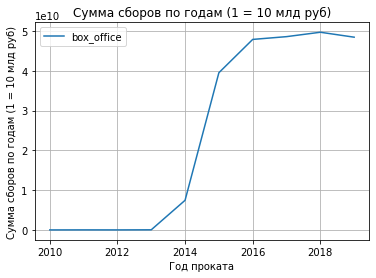

In [ ]:
# Очищаем колонку от пропусков и выводим таблицу с суммой сборов

box_sum = df_pivot.dropna()
pd.options.display.float_format = '{:.20}'.format
display(box_sum)

# Выводим график с суммой сборов по годам

box_sum.plot(y = 'box_office',  grid = True)
plt.xlabel('Год проката')
plt.ylabel('Сумма сборов по годам (1 = 10 млд руб)')
plt.title('Сумма сборов по годам (1 = 10 млд руб)')
plt.show()


**Вывод:** 

Имеется явная `тенденция к увеличению суммы сборов` от года к году. Мы наблюдаем наименьшие сборы в 2010 г и максимальные сборы в 2018 г.

Однако увеличение сборов может быть `связано с постепенным ростом информации о новых фильмах`.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [ ]:
# Выводим сводную таблицу со средней и медианной суммой сборов для каждого года.

pd.options.display.float_format = '{:.2}'.format
df_mm = df.pivot_table(index='show_start_year', values=['box_office'], aggfunc=['mean', 'median'])
df_mm

,mean,median
,box_office,box_office
show_start_year,,
2010,2.3e+04,1.7e+03
2011,1.3e+05,3e+03
2012,5.4e+04,5.7e+03
2013,1.6e+05,3.5e+03
2014,2.7e+07,1.8e+04
2015,8.5e+07,4.9e+06
2016,9.1e+07,3.8e+06
2017,1.4e+08,1e+07


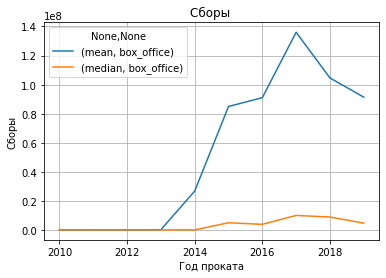

In [ ]:
# Сравнение распределения средних и медианных значений

df_mm.plot(grid = True)
plt.xlabel('Год проката')
plt.ylabel('Сборы')
plt.title('Сборы ')
plt.show()

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

- Большая разница между медианными и средними значениями нам говорит о том что есть выделяющиеся на общем фоне значения по сборам. Некоторые сборы резко выше большинства значений.

In [ ]:
# Делаем срез за период 2015-2019 гг.

df1515 = df[df['show_start_year'] >= 2015]

In [ ]:
# меняем названия значений в колонке 'age_restriction' для лучшего отображенияна на графике

old_age_name = ['«0+» - для любой зрительской аудитории', '«12+» - для детей старше 12 лет', '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей', '«6+» - для детей старше 6 лет']
new_age_name = ['00+', '12+', '16+', '18+', '06+']

df1515 = df1515.copy()

df1515['age_restriction'].replace(old_age_name, new_age_name,inplace=True)


In [ ]:
# Выодим сводную таблицу с суммой сборов по возрастным ограничениям и по годам на экран

pd.options.display.float_format = '{:.20}'.format

df_sum1515 = df1515.pivot_table(index=['age_restriction', 'show_start_year'], values=['box_office'], aggfunc=['sum'])
df_sum1515.sort_values(by='age_restriction', ascending=True)

sum
                                           box_office
age_restriction show_start_year                      
00+             2015            379054578.37000000477
                2016            150228848.66999998689
                2017                      229598930.0
                2018            32449002.109999999404
                2019            17746066.820000000298
06+             2015            8701799371.4099998474
                2016            12053146008.240001678
                2017            12086142145.760000229
                2018            10104974623.409999847
                2019            12852548650.859996796
12+             2019            12680198773.670000076
                2018            14267291660.690000534
                2017            7851427660.6700000763
                2016            12204446524.389997482
                2015             13616082008.90999794
16+             2015            11368120870.270000458
                2016            16664548541.740003586
                2017            18745042900.060001373
                2018            16503602346.959997177
                2019            12753418984.600002289
18+             2015            5432308367.4400014877
                2016            6793929818.8699989319
                2017            9651495581.0200004578
                2018            8760085501.1499996185
                2019            10121796303.640003204

age_restriction,00+,06+,12+,16+,18+
show_start_year,,,,,
2015,2943318.7000000001863,20380982.199999999255,15351562.5,4676819.4000000003725,4616614.7000000001863
2016,2571294.1000000000931,3026256.1450000000186,4690635.25,5133021.7400000002235,6107001.7400000002235
2017,22178956.0,51992103.0,9010548.0,9702077.0,8212677.0
2018,3616937.2799999997951,14688850.320000000298,8931965.660000000149,9010638.625,7179466.0
2019,3885434.5,12875350.339999999851,3405545.7599999997765,3210717.8100000000559,5603216.5499999998137


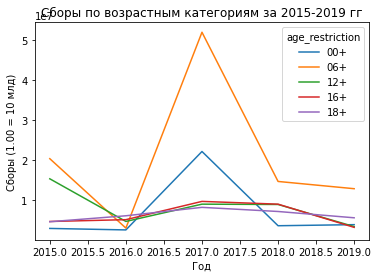

In [ ]:
# Чтобы увидеть влияние возрастного ограничения на сборы, строим график и таблицу

df1515.pivot_table(values="box_office", index="show_start_year", columns="age_restriction", aggfunc='median').plot()
plt.xlabel('Год')
plt.ylabel('Сборы (1.00 = 10 млд)')
plt.title('Сборы по возрастным категориям за 2015-2019 гг')

df1515.pivot_table(values="box_office", index="show_start_year", columns="age_restriction", aggfunc='median')

**Вывод:**

Как мы видим, возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) влияет на сборы фильма в прокате в период с 2015 по 2019 год


Максимальные сборы за период 2015-2019 гг принесли фильмы с возрастным ограничением 6+, и с отрывом, фильмы категории 0+.

Проверим, меняется ли сумма сборов в зависимости от года.

,sum
,box_office
show_start_year,
2015,39497365196.400009155
2016,47866299741.910041809
2017,48563707217.510002136
2018,49668403134.319992065
2019,48425708779.589996338


sum  box_office   49668403134.319992065
dtype: float64

Text(0.5, 1.0, 'Сборы по годам 2015-2019 гг.')

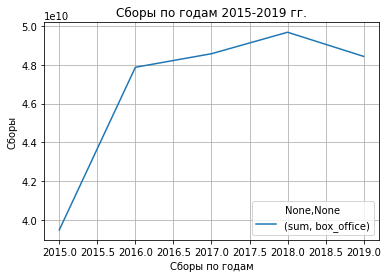

In [ ]:
# Строим график сборов фильмов по годам, независимо от категории

df_fa = df1515.pivot_table(index=['show_start_year'], values=['box_office'], aggfunc=['sum'])
display(df_fa)

# Выводим максимальную сумму сборов

display(df_fa.max())

# Выводим график на экран

df_fa.plot(grid = True)
plt.xlabel('Сборы по годам')
plt.ylabel('Сборы')
plt.title('Сборы по годам 2015-2019 гг.')

**Вывод:**

Из графика следует, что в целом сборы растут. Мы видим резкий прирост сборов с 2015 по 2016 гг, потом следуем умеренный рост с 2016 по 2018 гг, после его наблюдается небольшой спад вплоть до 2019 г.

Возможная `причина роста сборов`, это `увеличение` количества `зрителей` в категории 16+ вплоть до 2017 г. Рост после 2017 г произошёл из-за роста сборов за счёт фильмов категорий 06+ и 18+ что, однако, не смогло сдержать последующий спад общих сборо из-за падения сборов в категории 12+ начавшийся в 2018 г.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [ ]:
# Делаем срез таблицы оставляя только фильмы с господдержкой и убеждаемся что срез выполнен корректно

#dfgos = df[df['budget'] == df['budget']]
dfgos = df[~df['budget'].isna()]
display(dfgos.iloc[:, 0:20].head())
dfgos.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,lead_director,main_genre,gos_support%
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.0999999999999996447,"драма,мелодрама",365353.59999999997672,2013,А.Атанесян,драма,33.370313517243637591
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,28140.0,2014,А.Якимчук,NaN,70.000000269230767458
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.2999999999999998224,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,61.269064145927345066
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2000000000000001776,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.009472535955168837
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4000000000000003553,драма,232100.0,2014,М.Угаров,драма,62.476380804236953281


<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7477
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   puNumber               332 non-null    int64              
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               330 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64        

In [ ]:
# Выведем таблицу чтобы проверить корреляцию между значениями

dfgos.corr()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,gos_support%
puNumber,1.0,0.010412556489856766156,-0.030194167850886872301,-0.019794340033688354735,0.035684465262690714948,0.053664886521815988174,-0.017974708843298700667,-0.00028114279547168462932
refundable_support,0.010412556489856766156,1.0,0.35962164732637302844,0.64122365510800527488,-0.0037965484283698607004,0.31213682119686875227,0.089615889141707538723,-0.025356398718245198171
nonrefundable_support,-0.030194167850886872301,0.35962164732637302844,1.0,0.59416933266051374929,0.12564579476335885344,0.45572917236947341202,0.11764527330538872285,0.1203424384083053994
budget,-0.019794340033688354735,0.64122365510800527488,0.59416933266051374929,1.0,0.093116975207236357681,0.3613252256513027616,0.16464033307815953422,-0.29830833942594514596
ratings,0.035684465262690714948,-0.0037965484283698607004,0.12564579476335885344,0.093116975207236357681,1.0,0.14375541497787308609,0.024964843213189490817,-0.046337326258977032389
box_office,0.053664886521815988174,0.31213682119686875227,0.45572917236947341202,0.3613252256513027616,0.14375541497787308609,1.0,0.11927839031165504702,-0.11743639281031686972
show_start_year,-0.017974708843298700667,0.089615889141707538723,0.11764527330538872285,0.16464033307815953422,0.024964843213189490817,0.11927839031165504702,1.0,-0.073106655998836006516
gos_support%,-0.00028114279547168462932,-0.025356398718245198171,0.1203424384083053994,-0.29830833942594514596,-0.046337326258977032389,-0.11743639281031686972,-0.073106655998836006516,1.0


**`Вывод: `**

Сильной корреляции между значениями не наблюдается

#### Посмотрим, как распределяется окупаемость поддержки в зависимости от спонсора

In [ ]:
# Создадим новую колонку с разницей бюджета и сборов

dfgos = dfgos.copy()
dfgos['budget_box_off'] = dfgos['box_office'] - dfgos['budget']

# Создадим функцию для вывода нужных графиков

def graph(dfgos, index, values_list, aggfunc, x='Год', y='Сумма', title='Окупаемость', kind='bar'):
    dfgos.pivot_table(index=index, values=values_list, aggfunc=aggfunc).plot(kind=kind, grid = True)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.show

# Создадим функцию для вывода нужных таблиц

def table(dfgos, index, values_list, aggfunc):
    display(dfgos.pivot_table(index=index, values=values_list, aggfunc=aggfunc))

,box_office,budget,budget_box_off
financing_source,,,
Министерство культуры,5322018327.9299983978,11469203758.0,-5587235151.0700016022
"Министерство культуры, Фонд кино",805338418.25999987125,2626309609.0,-1820971190.7400000095
Фонд кино,35986152828.589996338,28144752572.0,8935547758.5900001526


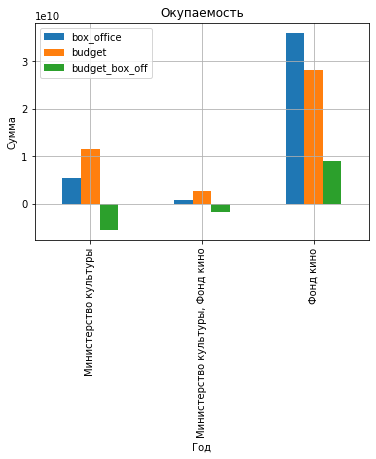

In [ ]:
# Посмотрим, как распределяется окупаемость поддержки в зависимости от спонсора
# Выводим график

graph(dfgos, 'financing_source', ['box_office', 'budget', 'budget_box_off'], 'sum', x='Год', y='Сумма', title='Окупаемость')

# Выводим таблицу

table(dfgos, 'financing_source', ['box_office', 'budget', 'budget_box_off'], 'sum')

**Вывод:**

Мы видим, что окупаемость отличается в зависимости от спонсора.

- Сборы от фильмов профинансированных Минкультом значительно меньше затраченых средств - дефицитные
- Сборы от фильмов профинансированных Минкультом вместе с Фондом кино также не окупаются, но они примерно в 5 раз менее дефицитные чем первые
- На фоне убыточного баланса Минкульта, выгодно отличается Фонд кино, фильмы профинансированные фондом показывают профицит

#### Посмотрим тенденцию окупаемости просмотров по годам

,box_office,budget,budget_box_off
show_start_year,,,
2013,20322385.10000000149,255435390.0,-235113004.90000000596
2014,1017422166.6000000238,1279484783.0,-262062616.39999997616
2015,5785285418.1400022507,7309669207.0,-1482384804.8600003719
2016,6081707839.1000003815,7228942748.0,-1128528828.9000000954
2017,10865075300.960000992,6972172568.0,3998502732.9600000381
2018,9934069010.25,6651694634.0,3282374376.25
2019,8409627454.6300001144,12542866609.0,-2645446437.3700017929


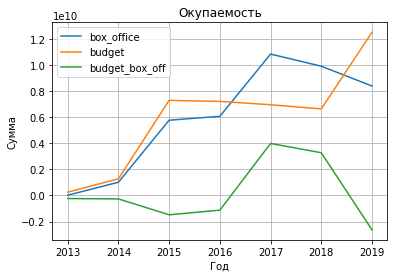

In [ ]:
# Вызываем функцию чтобы проверить окупаемость фикартин по годам с 2013 по 2019
# Выводим график

graph(dfgos, 'show_start_year', ['box_office', 'budget', 'budget_box_off'], 'sum', x='Год', y='Сумма', title='Окупаемость', kind='line')

# Выводим таблицу

table(dfgos, 'show_start_year', ['box_office', 'budget', 'budget_box_off'], 'sum')

**Вывод:**

Мы видим, что прослеживается изменчивость окупаемости в разные года.
- положительная окупаемость наблюдается в период с 2017 по 2018 гг с пиком в 2017 г.

#### Проанализируем взаимосвязь сборов и бюджета от рейтинга фильма

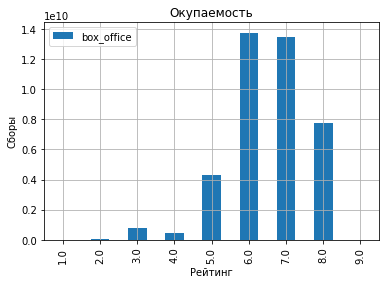

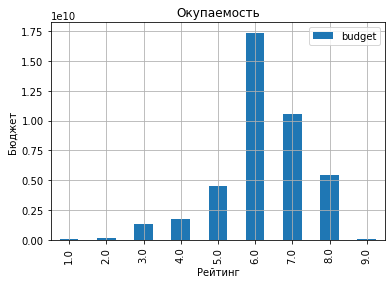

In [ ]:
# округляем рейтинги, для лучшего отображения. Создаём для этого новую колонку в dfgos

dfgos['ratings_rounded'] = dfgos['ratings'].round(0)

# Вызываем функцию чтобы проверить взаимосвязь сборов от рейтинга

graph(dfgos, 'ratings_rounded', ['box_office'], 'sum', x='Рейтинг', y='Сборы', title='Окупаемость', kind='bar')


# Вызываем функцию чтобы проверить взаимосвязь бюджета от рейтинга

graph(dfgos, 'ratings_rounded', ['budget'], 'sum', x='Рейтинг', y='Бюджет', title='Окупаемость', kind='bar')

**Вывод:**

Согласно данным из графика, самые высокие сборы приносят фильмы с рейтингом от 6 до 8 баллов

Фильмы с самым большим буджетом получают чуть меньше 6 баллов рейтинга.


#### Смотрим на самые поппулярные фильмы (высокий рейтинг) что это за фильмы?

In [ ]:
# Проверяем создание новой колонки

dfgos.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,lead_director,main_genre,gos_support%,budget_box_off,ratings_rounded
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,8.0999999999999996447,"драма,мелодрама",365353.59999999997672,2013,А.Атанесян,драма,33.370313517243637591,-79046546.40000000596,8.0
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,NaN,NaN,28140.0,2014,А.Якимчук,NaN,70.000000269230767458,-37114717.0,NaN


In [ ]:
# Создаём функцию для вывода таблицы

def rr(index, values, by):
    display(dfgos.pivot_table(index=index, values=[values]).sort_values(by=by, ascending=False).head(10))

# Выводим 20 самых поппулярных жанров
rr('main_genre', 'ratings_rounded','ratings_rounded')

# Выводим 20 жанров с самым большим бюджетом
rr('main_genre', 'budget', 'budget')

# Выводим 20 жанров с самыми большими сборами
rr('main_genre', 'box_office', 'box_office')


,ratings_rounded
main_genre,
криминал,7.3333333333333330373
биография,7.0
детектив,7.0
детский,7.0
спорт,7.0
боевик,6.6666666666666669627
военный,6.5555555555555553582
мюзикл,6.5
драма,6.4086021505376340457


,budget
main_genre,
история,536265551.5
приключения,482106027.0
детектив,239644459.40000000596
спорт,236822988.33333334327
фэнтези,212738524.09090909362
фантастика,199372801.36363637447
биография,176311212.33333334327
мультфильм,170499982.80645161867
военный,142878536.11111110449


,box_office
main_genre,
спорт,989256129.146666646
история,363867058.64249998331
приключения,200932829.43666663766
мультфильм,187400471.15533339977
биография,172294345.87999999523
фантастика,171820427.93899995089
комедия,170958595.26479455829
военный,113074496.86666665971
драма,109090162.08091953397


**Вывод:**

Фильмы с самым высоким бюджетом не всегда самые рейтинговые, Фильмы про спорт имеют хорошие сборы и хороший рейтинг.

Самые высокие бюджеты у фильмов в жанре которых присутсвует спорт, история и приключения 


### Шаг 5. Напишите общий вывод

**`Общий вывод:`**


В ходе данного исследования была поставлена задача выявить `текущие тренды` на рыке россйского проката, а также отдельно изучить и проанализировать фильмы пользующиеся господдержкой, насколько эти фильмы `интересны зрителю`.


**`Ход работы:`**

Перед началом исследования было выполнено `объединение информации` из разных источников в единую таблцу с последующей предобработкой включающей в себя поиск и выявление дубликатов в данных.

При последующей предобработке, также, были удалены неявные дубликаты, высчитаны новые, промежуточные значения, составлены подробные графики которые позволили визуализировать информацию и подготовить почву для составления выводов исследвания.


**`Исследование выявило следущие закономерности и особенности:`**

- В результате исследовательского анализа была выявлена общая `тенденция к увеличению` доли фильмов выходящих в прокат в кинотеатрах от года к году.
При этом есть местный спад в 2016 г. затем рост с пиком приходящимся на 2017 г и последующим снижением в 2018 г, далее с небольим ростом в 2019 г.


- Параллельно с ростом проката миеется явная `тенденция к увеличению суммы сборов` от года к году. Мы наблюдаем наименьшие сборы в 2010 г и максимальные сборы в 2018 г. Однако, увеличение сборов может быть `связано с общим увеличением доли прокатов в кинотеатрах`.


- Возрастное ограничение тоже оказывает влияние на сборы фильма в прокате в проанализированый период с 2015 по 2019 год.
Максимальные сборы за период 2015-2019 гг принесли фильмы с возрастным ограничением 12+.


- На основании построенных графиков мы можем наблюдать что в целом, `сборы растут`. Мы вдим резкий прирост сборов с 2015 по 2016 гг, потом следуем умеренный рост с 2016 по 2018 гг, после его наблюдается небольшой спад вплоть до 2019 г.


Также, была предпринята попытка нахождения зависимости сборов от спонсора кинофильма. В результате проведённого исследования было показано что окупаемость фильмов значительно отличается в зависомости от спонсора.

- Сборы от фильмов профинансированных Минкультом значительно меньше затраченных средств - дефицитные
- Сборы от фильмов профинансированных Минкультом вместе с Фондом кино также не окупаются, но они примерно в 5 раз менее дефицитные чем первые
- На фоне убыточного баланса Минкульта, выгодно отличается Фонд кино, фильмы профинансированные фондом показывают профицит

- Была выявлена изменчивость окупаемости в разные года.
Положительная окупаемость наблюдается в период с 2017 по 2018 гг с пиком в 2017 г.

- Самые высокие сборы приносят фильмы с рейтингом от 6 до 8 баллов. Фильмы с самым большим бюджетом получают чуть меньше 6 баллов рейтинга.

- Фильмы с самым высоким бюджетом не всегда самые рейтинговые, Фильмы про спорт имеют хорошие сборы и хороший рейтинг.

- Самые высокие бюджеты у фильмов в жанре которых присутсвует спорт, история и приключения 